In [1]:
#creating Visualizations of Wage and Cost Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CostDF = pd.read_csv('createdassets/StateCostDF.csv',index_col=0)
WageDF = pd.read_csv('createdassets/StateWageDF.csv',index_col=0)
#salary and price parity
SalPar = pd.read_csv('combined.csv')

In [4]:
WageDF.head(5)

,WageType,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(1 WORKING) - 0,2 ADULTS(1 WORKING) - 1,2 ADULTS(1 WORKING) - 2,2 ADULTS(1 WORKING) - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3,State
0,Living Wage,15.920633,29.833772,36.800161,47.951060,24.813712,29.613171,35.035658,37.926495,12.408279,16.638972,21.178662,24.454083,Alabama
1,Minimum Wage,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,7.250000,Alabama
2,Poverty Wage,6.190000,8.380000,10.560000,12.740000,8.380000,10.560000,12.740000,14.920000,4.190000,5.280000,6.370000,7.460000,Alabama
0,Living Wage,16.481000,32.520618,40.823940,54.716877,25.446640,30.793430,36.116649,40.474174,12.723043,17.941728,23.150650,27.872535,Alaska
1,Minimum Wage,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,10.340000,Alaska


In [5]:
SalPar.rename(columns = {'Standardized Income':'Income v Parity'}, inplace = True)
SalPar.head()

,State,Year,Income,Price Parities,Income v Parity
0,Wyoming,2022,73248.0,91.903,79701.42
1,North Dakota,2022,70360.0,88.656,79362.93
2,Connecticut,2022,82938.0,106.412,77940.46
3,South Dakota,2022,68176.0,87.991,77480.65
4,Massachusetts,2022,84561.0,109.393,77300.19


In [6]:
CostSum = CostDF.where(CostDF['CostType'] != 'Required annual income after taxes').dropna(subset='CostType')
CostSum = CostSum.where(CostSum['CostType'] != 'Required annual income before taxes').dropna(subset='CostType')
CostSum = CostSum.groupby('State').sum()
CostSum.reset_index(inplace=True)
CostSum.head()

,State,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(1 WORKING) - 0,2 ADULTS(1 WORKING) - 1,2 ADULTS(1 WORKING) - 2,2 ADULTS(1 WORKING) - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3
0,Alabama,32993.034563,61930.312125,76421.658617,99613.683170,51489.926625,67644.445887,85093.524195,97281.598837,51489.926625,69087.783448,87979.976141,101610.847355
1,Alaska,34161.516512,67520.447373,84789.881160,113688.950524,52803.378395,73038.275393,93222.616437,111400.193186,52803.378395,74515.447373,96177.312645,115832.013918
2,Arizona,36156.487428,66947.717365,81331.858797,108157.051030,55362.885828,72966.023725,90629.671967,106406.355926,55362.885828,74299.733393,93297.858797,110409.133533
3,Arkansas,32244.086011,62449.235073,78175.922171,102880.826867,50421.938317,67945.800593,86379.750664,99676.106610,50421.938317,69687.040851,89862.922171,104900.711328
4,California,45474.259096,91483.936928,113832.656346,153331.857250,69255.290699,95873.180990,119690.271296,145370.395042,69255.290699,99327.671669,126599.579909,155733.875518


In [7]:
WageTarg = WageDF.where(WageDF['WageType'] == 'Living Wage').dropna(subset='WageType')
WageTarg.drop(['WageType'],axis=1,inplace=True)
for column in WageTarg.columns:
    if column == 'State':
        continue
    elif 'BOTH WORKING' in column:
        WageTarg[column] = WageTarg[column].apply(lambda x: x * 40 * 52 * 2)
    else:
        WageTarg[column] = WageTarg[column].apply(lambda x: x * 40 * 52)
WageTarg

,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(1 WORKING) - 0,2 ADULTS(1 WORKING) - 1,2 ADULTS(1 WORKING) - 2,2 ADULTS(1 WORKING) - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3,State
0,33114.915788,62054.246717,76544.334810,99738.205569,51612.521248,61595.396007,72874.169363,78887.110521,51618.440085,69218.123361,88103.232664,101728.985001,Alabama
0,34280.480195,67642.886213,84913.794994,113811.103635,52929.011954,64050.334197,75122.628965,84186.281371,52927.858478,74637.587060,96306.703882,115949.745175,Alaska
0,36275.466320,67069.952979,81450.339267,108276.477583,55486.150046,67064.690618,78693.533731,88444.023741,55500.325119,74418.020647,93411.629338,110525.092386,Arizona
0,32368.403323,62570.102650,78297.907181,103005.832458,50541.943300,61034.253372,72444.370297,78705.079042,50545.232018,69807.772132,89988.722234,105026.504627,Arkansas
0,45592.972704,91606.263078,113954.894443,153453.802093,69375.277690,84592.612254,97006.873819,111285.562942,69381.563783,99454.566180,126722.353408,155857.081930,California
0,39818.023274,77946.010579,98629.718354,132719.612215,60651.791134,71701.587297,83390.935136,94105.717898,60649.839182,85337.842534,110642.604937,134989.183630,Colorado
0,38625.600000,75615.800000,94205.800000,124911.800000,59085.000000,71008.600000,83270.200000,90521.600000,59077.200000,82726.800000,107296.800000,126474.400000,Connecticut
0,36823.519115,72826.825406,90579.652816,118702.589217,56185.115813,69389.625713,80903.779760,88533.516468,56190.343528,80140.788933,102375.960911,120740.989217,Delaware
0,35818.105548,70419.505606,87289.141823,114913.655187,54652.889883,66775.654527,77402.530530,85634.627632,54658.699399,77165.899050,98171.386810,116793.331434,Florida
0,36750.634091,66609.675951,82148.350297,107071.909432,54791.854509,65235.902124,76613.884312,83293.041534,54790.738582,73837.496392,93808.356598,109096.182243,Georgia


In [8]:
WageTarg.columns

Index(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       '2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       '2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3', 'State'],
      dtype='object')

In [9]:
WagevCost = pd.DataFrame(columns=WageTarg.columns)
for column in WageTarg.columns:
    if column == 'State':
        continue
    else:
        Wage = list(WageTarg[column])
        Cost = list(CostSum[column])
        WvC = []
        if 'BOTH WORKING' in str(column):
            for i in range(len(Wage)):
                WvC.append(Wage[i] / Cost[i])
        else:
            for i in range(len(Wage)):
                WvC.append(Wage[i] / Cost[i])
        #print(len(WvC))
        WagevCost[column] = [x for x in WvC]
#
#print(adding)

In [10]:
#WagevCost.drop(['2 ADULTS(1 WORKING) - 0','2 ADULTS(1 WORKING) - 1',
#             '2 ADULTS(1 WORKING) - 2','2 ADULTS(1 WORKING) - 3'],axis=1,inplace=True)
WagevCost['State'] = [x for x in WageTarg['State']]
WagevCost.head()
#map this data in a visualization

,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(1 WORKING) - 0,2 ADULTS(1 WORKING) - 1,2 ADULTS(1 WORKING) - 2,2 ADULTS(1 WORKING) - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3,State
0,1.003694,1.002001,1.001605,1.001250,1.002381,0.910576,0.856401,0.810915,1.002496,1.001887,1.001401,1.001163,Alabama
1,1.003482,1.001813,1.001461,1.001074,1.002379,0.876942,0.805841,0.755710,1.002357,1.001639,1.001345,1.001016,Alaska
2,1.003291,1.001826,1.001457,1.001104,1.002226,0.919122,0.868298,0.831191,1.002483,1.001592,1.001219,1.001050,Arizona
3,1.003856,1.001935,1.001560,1.001215,1.002380,0.898279,0.838673,0.789608,1.002445,1.001732,1.001400,1.001199,Arkansas
4,1.002611,1.001337,1.001074,1.000795,1.001733,0.882339,0.810483,0.765531,1.001823,1.001278,1.000970,1.000791,California


In [11]:
WagevCost2 = pd.DataFrame(WagevCost['State'])
WagevCost2['No Children'] = (WagevCost['1 ADULT - 0'] + WagevCost['2 ADULTS(BOTH WORKING) - 0'])/2
WagevCost2['1 Child'] = (WagevCost['1 ADULT - 1'] + WagevCost['2 ADULTS(BOTH WORKING) - 1'])/2
WagevCost2['2 Children'] = (WagevCost['1 ADULT - 2'] + WagevCost['2 ADULTS(BOTH WORKING) - 2'])/2
WagevCost2['3 Children'] = (WagevCost['1 ADULT - 3'] + WagevCost['2 ADULTS(BOTH WORKING) - 3'])/2
WagevCost2['Average'] = (WagevCost2['No Children'] + WagevCost2['1 Child']
                                               + WagevCost2['2 Children'] + WagevCost2['3 Children'])/4
WagevCost2.head(3)

,State,No Children,1 Child,2 Children,3 Children,Average
0,Alabama,1.003095,1.001944,1.001503,1.001206,1.001937
1,Alaska,1.002920,1.001726,1.001403,1.001045,1.001774
2,Arizona,1.002887,1.001709,1.001338,1.001077,1.001753


In [12]:
Top5 = ['Wyoming', 'North Dakota', 'South Dakota', 'Massachusetts']
'''Wyoming: $79,701
North Dakota: $79,363
Connecticut: $77,940
South Dakota: $77,481
Massachusetts: $77,300
'''
Top5CompSci = ['Washington', 'Virginia', 'New York', 'California']
BothTop5 = ['Connecticut']

def coloring(x):
    if x in Top5:
        return 'In Salary v Price Top 5'
    elif x in Top5CompSci:
        return 'Comp Sci Top 5'
    elif x in BothTop5:
        return 'In Both Top 5s'
    else:
        return 'Not in either Top 5'

WagevCost2['Top 5 Best Salary v Price?'] = [coloring(x) for x in WagevCost2['State']]
#.head(15)

In [13]:
WagevCost2

,State,No Children,1 Child,2 Children,3 Children,Average,Top 5 Best Salary v Price?
0,Alabama,1.003095,1.001944,1.001503,1.001206,1.001937,Not in either Top 5
1,Alaska,1.002920,1.001726,1.001403,1.001045,1.001774,Not in either Top 5
2,Arizona,1.002887,1.001709,1.001338,1.001077,1.001753,Not in either Top 5
3,Arkansas,1.003150,1.001834,1.001480,1.001207,1.001918,Not in either Top 5
4,California,1.002217,1.001307,1.001022,1.000793,1.001335,Comp Sci Top 5
5,Colorado,1.002616,1.001562,1.001175,1.000934,1.001572,Not in either Top 5
6,Connecticut,1.002600,1.001546,1.001232,1.000999,1.001594,In Both Top 5s
7,Delaware,1.002752,1.001661,1.001284,1.001025,1.001680,Not in either Top 5
8,Florida,1.002826,1.001640,1.001328,1.001063,1.001714,Not in either Top 5
9,Georgia,1.002803,1.001799,1.001373,1.001162,1.001784,Not in either Top 5


Text(0, 0.5, 'Average Across All Numbers of Adults and Children')

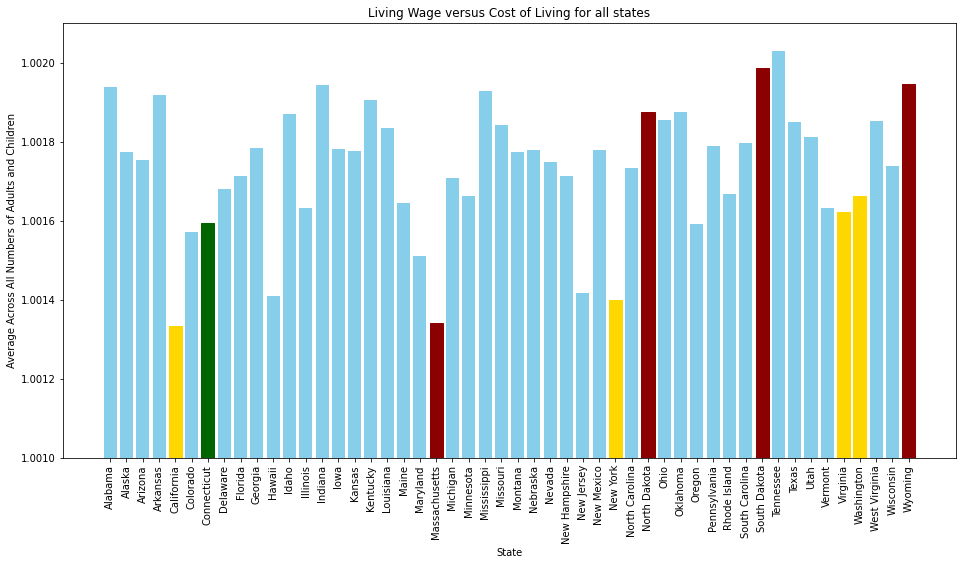

In [14]:
chart = plt.figure(figsize=(16,8))

#chart = sns.scatterplot(data = WagevCost2,x = 'State',y='Average',hue = 'Top 5 Best Salary v Price?',legend=True)

chart = plt.bar(x=WagevCost2['State'],height=WagevCost2['Average'],width=0.8,color='skyblue')

chart[4].set_color('gold')
chart[31].set_color('gold')
chart[45].set_color('gold')
chart[46].set_color('gold')
chart[6].set_color('darkgreen')
chart[20].set_color('darkred')
chart[33].set_color('darkred')
chart[40].set_color('darkred')
chart[49].set_color('darkred')

#chart.tick_params(axis='x', labelrotation=90)
plt.title('Living Wage versus Cost of Living for all states')
plt.xticks(rotation=90)
plt.xlabel('State')
#chart.set_ylim(1.5, 1.51) 
plt.ylim(1.001,1.0021)
plt.ylabel('Average Across All Numbers of Adults and Children')

In [15]:
#average the wage and cost data horizontally
#add that to the SalPar dataframe
#map that out

WageTargAvg = WageTarg.copy()
WageTargAvg.drop(['State'],axis=1,inplace=True)
WageTargAvg.drop(['2 ADULTS(1 WORKING) - 0','2 ADULTS(1 WORKING) - 1',
             '2 ADULTS(1 WORKING) - 2','2 ADULTS(1 WORKING) - 3'],axis=1,inplace=True)
WageTargAvg['Wage Average'] = WageTargAvg.mean(axis=1)
WageTargAvg['State'] = WageTarg['State']
WageTargAvg.drop(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       #'2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       #'2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3'],axis=1,inplace=True)

CostSumAvg = CostSum.copy()
CostSumAvg.drop(['State'],axis=1,inplace=True)
CostSumAvg.drop(['2 ADULTS(1 WORKING) - 0','2 ADULTS(1 WORKING) - 1',
             '2 ADULTS(1 WORKING) - 2','2 ADULTS(1 WORKING) - 3'],axis=1,inplace=True)
CostSumAvg['Cost Average'] = CostSumAvg.mean(axis=1)
CostSumAvg['State'] = CostSum['State']
CostSumAvg.drop(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       #'2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       #'2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3'],axis=1,inplace=True)

CompSci = pd.read_csv('createdassets/ComputerScience.csv',index_col=0)
CompSci['Typical Annual Salary'] = [x[1:] for x in CompSci['Typical Annual Salary']]
CompSci['Typical Annual Salary'] = [int(x.replace(',','')) for x in CompSci['Typical Annual Salary']]

SalPar.set_index('State',inplace=True)
WageTargAvg.set_index('State',inplace=True)
CostSumAvg.set_index('State',inplace=True)
CompSci.set_index('State',inplace=True)
SalPar = SalPar.join(WageTargAvg)
SalPar = SalPar.join(CostSumAvg)
SalPar = SalPar.join(CompSci)
SalPar = SalPar.dropna()
SalPar.reset_index(inplace=True)
SalPar.head(5)

,State,Year,Income,Price Parities,Income v Parity,Wage Average,Cost Average,Occupational Area,Typical Annual Salary
0,Wyoming,2022,73248.0,91.903,79701.42,74094.348818,73970.345768,Computer & Mathematical,66672.0
1,North Dakota,2022,70360.0,88.656,79362.93,76048.267849,75926.095192,Computer & Mathematical,73787.0
2,Connecticut,2022,82938.0,106.412,77940.46,88616.775000,88493.953125,Computer & Mathematical,98012.0
3,South Dakota,2022,68176.0,87.991,77480.65,72277.303410,72153.930558,Computer & Mathematical,70727.0
4,Massachusetts,2022,84561.0,109.393,77300.19,108870.497481,108747.457138,Computer & Mathematical,108541.0


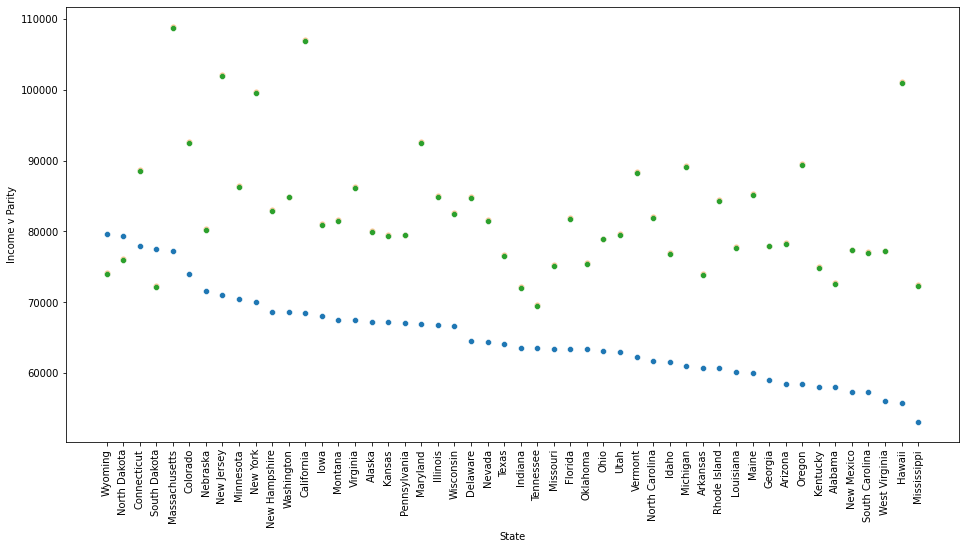

In [16]:
chart = plt.figure(figsize=(16,8))

chart1 = sns.scatterplot(x = 'State',y='Income v Parity',
                data = SalPar, legend=True)

chart2 = sns.scatterplot(x = 'State',y='Wage Average',
                data = SalPar, legend=True)

chart3 = sns.scatterplot(x = 'State',y='Cost Average',
                data = SalPar, legend=True)

chart1.tick_params(axis='x', labelrotation=90)
#plt.legend([chart1, chart2, chart3], ['Income v Parity', 'Wage Average', 'Cost Average'])

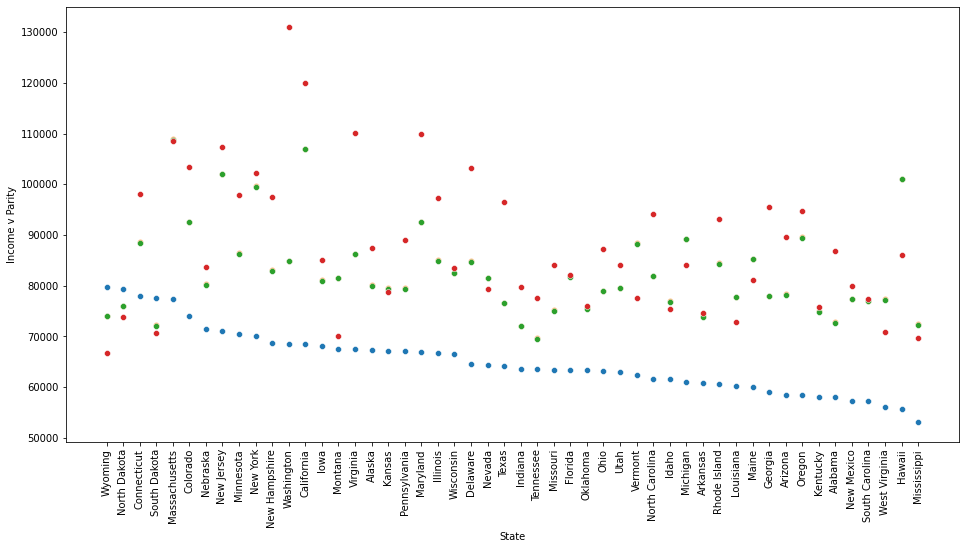

In [17]:
chart = plt.figure(figsize=(16,8))

chart1 = sns.scatterplot(x = 'State',y='Income v Parity',
                data = SalPar, legend=True)

chart2 = sns.scatterplot(x = 'State',y='Wage Average',
                data = SalPar, legend=True)

chart3 = sns.scatterplot(x = 'State',y='Cost Average',
                data = SalPar, legend=True)

chart4 = sns.scatterplot(x = 'State',y='Typical Annual Salary',
                data = SalPar, legend=True)

chart1.tick_params(axis='x', labelrotation=90)
#plt.legend([chart1, chart2, chart3], ['Income v Parity', 'Wage Average', 'Cost Average'])

In [18]:
SalPar.columns

Index(['State', 'Year', 'Income', 'Price Parities', 'Income v Parity',
       'Wage Average', 'Cost Average', 'Occupational Area',
       'Typical Annual Salary'],
      dtype='object')

In [19]:
SPcor = SalPar[['Income v Parity','Wage Average', 'Cost Average','Typical Annual Salary']]
SPcor.corr()

,Income v Parity,Wage Average,Cost Average,Typical Annual Salary
Income v Parity,1.000000,0.270905,0.270921,0.259399
Wage Average,0.270905,1.000000,1.000000,0.669254
Cost Average,0.270921,1.000000,1.000000,0.669269
Typical Annual Salary,0.259399,0.669254,0.669269,1.000000
